In [52]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import numpy as np
import glob
import cv2

### MNIST example

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [34]:
x_train.shape

(60000, 28, 28)

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2206 - acc: 0.9357
Epoch 2/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0974 - acc: 0.9709
Epoch 3/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.0690 - acc: 0.9783
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0540 - acc: 0.9829
Epoch 5/5
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0440 - acc: 0.9860


In [12]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0709 - acc: 0.9794


[0.07085114632247715, 0.9794]

### Our data

Load data

In [14]:
labels = ['yafim', 'zeev', 'or', 'ron', 'sergey']

In [37]:
x_data = []
y_data = []

In [38]:
for i, l in enumerate(labels):
    for f in tqdm(glob.glob('../data/frames/24032019/{0}/32/*.png'.format(l))):
        x_data.append(cv2.imread(f, cv2.IMREAD_GRAYSCALE))
        y_data.append(i)

100%|██████████| 3000/3000 [00:00<00:00, 9543.32it/s]


In [45]:
x_data = np.asarray(x_data)
y_data = np.asarray(y_data)

In [48]:
x_data.shape

(15000, 32, 32)

In [49]:
y_data

array([0, 0, 0, ..., 4, 4, 4])

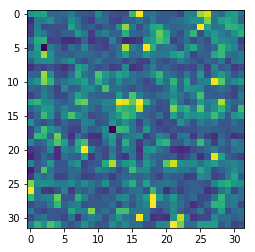

In [50]:
plt.imshow(x_data[0])
plt.show()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

In [61]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [62]:
x_train.shape

(12000, 32, 32)

In [71]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [72]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [73]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

In [74]:
model.fit(x_train, y_train, epochs=3, callbacks=[tb_callback])

Epoch 1/3
12000/12000 [==============================] - 2s 184us/sample - loss: 0.1421 - acc: 0.9647
Epoch 2/3
12000/12000 [==============================] - 2s 170us/sample - loss: 0.0020 - acc: 1.0000
Epoch 3/3
12000/12000 [==============================] - 2s 171us/sample - loss: 6.8952e-04 - acc: 1.0000


In [75]:
model.evaluate(x_test, y_test)

3000/3000 [==============================] - 0s 61us/sample - loss: 2.2064e-04 - acc: 1.0000


[0.00022064074540200333, 1.0]